1. 방문지정보에서 필요한 컬럼을 뽑아서 통합하기

1) TS, VS의 방문지정보 파일에서 필요한 컬럼만 선택
TRAVEL_ID, VISIT_AREA_ID, VISIT_ORDER, X_COORD, Y_COORD, POI_ID, POI_NM

2) 두 파일을 하나로 통합

In [2]:
import pandas as pd

# 1. 파일 경로 설정
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_visit_area_info_방문지정보_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_visit_area_info_방문지정보_B.csv"

# 2. 파일 불러오기
ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_df = pd.read_csv(vs_path, encoding='utf-8-sig')

# 3. 출처 구분을 위한 컬럼 추가 (선택 사항)
ts_df["SET"] = "Training"
vs_df["SET"] = "Validation"

# 4. 병합
visit_df = pd.concat([ts_df, vs_df], ignore_index=True)

# 5. 필요한 컬럼만 추출
cols = ['TRAVEL_ID', 'VISIT_AREA_ID', 'VISIT_ORDER', 'X_COORD', 'Y_COORD', 'POI_ID', 'POI_NM']
visit_df = visit_df[cols].copy()

# 6. 결측치 점검 (기본 확인)
print("\n✅ 방문지 정보 요약:")
print("총 행 수:", len(visit_df))
print("결측치 수:\n", visit_df.isna().sum())

# 7. 저장
visit_df.to_csv("방문지정보_필요컬럼_ts_vs.csv", index=False, encoding='utf-8-sig')
print("\n🎉 방문지정보_필요컬럼_ts_Vs.csv 저장 완료")

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\699025930.py:8: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')



✅ 방문지 정보 요약:
총 행 수: 41607
결측치 수:
 TRAVEL_ID            0
VISIT_AREA_ID        0
VISIT_ORDER          0
X_COORD           8081
Y_COORD           8081
POI_ID           23592
POI_NM           23592
dtype: int64

🎉 방문지정보_필요컬럼_ts_Vs.csv 저장 완료


2. 여행 파일 합치기

In [4]:
import pandas as pd

# 1. 파일 경로
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_travel_여행_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_travel_여행_B.csv"

# 2. 파일 불러오기 + 구분 컬럼 추가
ts_df = pd.read_csv(ts_path, encoding='utf-8-sig')
ts_df["SET"] = "Training"
vs_df = pd.read_csv(vs_path, encoding='utf-8-sig')
vs_df["SET"] = "Validation"

# 3. 병합
travel_df = pd.concat([ts_df, vs_df], ignore_index=True)

# 4. 필요한 컬럼만 선택
cols = ['TRAVEL_ID', 'TRAVEL_START_YMD', 'TRAVEL_END_YMD', 'MVMN_NM', 'SET']
travel_df = travel_df[cols].copy()

# 5. 결측치 및 이상치 기본 점검
print("\n✅ 여행 정보 요약:")
print("총 행 수:", len(travel_df))
print("고유 TRAVEL_ID 수:", travel_df['TRAVEL_ID'].nunique())
print("\n📌 결측치 수:")
print(travel_df.isna().sum())

# 6. 날짜 유효성 점검 (출발일 < 도착일)
invalid_dates = travel_df[travel_df['TRAVEL_START_YMD'] > travel_df['TRAVEL_END_YMD']]
print(f"\n🚨 출발일이 도착일보다 늦은 행 수: {len(invalid_dates)}")

# 7. 저장
travel_df.to_csv("여행_필요컬럼_ts_vs.csv", index=False, encoding='utf-8-sig')
print("\n🎉 여행_필요컬럼_ts_vs.csv 저장 완료")


✅ 여행 정보 요약:
총 행 수: 3600
고유 TRAVEL_ID 수: 3600

📌 결측치 수:
TRAVEL_ID             0
TRAVEL_START_YMD      0
TRAVEL_END_YMD        0
MVMN_NM             692
SET                   0
dtype: int64

🚨 출발일이 도착일보다 늦은 행 수: 0

🎉 여행_필요컬럼_ts_vs.csv 저장 완료


3. 이동내역 파일 합치기

In [10]:
# 이동내역 데이터 불러오기 및 컬럼 필터링
import pandas as pd

# 파일 경로
ts_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_move_his_이동내역_B.csv"
vs_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_move_his_이동내역_B.csv"

# 불러오기
ts_move = pd.read_csv(ts_path, encoding='utf-8-sig')
vs_move = pd.read_csv(vs_path, encoding='utf-8-sig')

# 병합 및 컬럼 필터링
cols_to_keep = ['TRAVEL_ID', 'START_VISIT_AREA_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']
move_df = pd.concat([ts_move[cols_to_keep], vs_move[cols_to_keep]], ignore_index=True)

4. visit_area_id 만들기

In [12]:
# START → NaN 제거
start_part = move_df[['TRAVEL_ID', 'START_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].dropna(subset=['START_VISIT_AREA_ID']).copy()
start_part = start_part.rename(columns={'START_VISIT_AREA_ID': 'VISIT_AREA_ID'})

# END → NaN 제거
end_part = move_df[['TRAVEL_ID', 'END_VISIT_AREA_ID', 'MVMN_CD_1', 'MVMN_CD_2']].dropna(subset=['END_VISIT_AREA_ID']).copy()
end_part = end_part.rename(columns={'END_VISIT_AREA_ID': 'VISIT_AREA_ID'})

# 세로 병합
visit_area_df = pd.concat([start_part, end_part], ignore_index=True)

# 확인
print("✅ 결합 완료!")
print("전체 행 수:", len(visit_area_df))
print("VISIT_AREA_ID 결측치 수:", visit_area_df['VISIT_AREA_ID'].isna().sum())

visit_area_df.to_csv("이동내역_VISIT_AREA_ID통합_정제.csv", index=False, encoding='utf-8-sig')
print("🎉 이동내역_VISIT_AREA_ID통합_정제.csv 저장 완료!")

✅ 결합 완료!
전체 행 수: 41591
VISIT_AREA_ID 결측치 수: 0
🎉 이동내역_VISIT_AREA_ID통합_정제.csv 저장 완료!


5. 전체 통합 파일 만들기

In [13]:
import pandas as pd

# 1. 파일 불러오기
travel_df = pd.read_csv("여행_필요컬럼_ts_vs.csv", encoding='utf-8-sig')  # 기준 테이블
visit_df = pd.read_csv("방문지정보_필요컬럼_ts_vs.csv", encoding='utf-8-sig')  # VISIT_AREA_ID 포함
move_df = pd.read_csv("이동내역_VISIT_AREA_ID통합_정제.csv", encoding='utf-8-sig')  # 이미 VISIT_AREA_ID 통합 완료된 상태

# 2. 방문지 + 여행 정보 병합 (TRAVEL_ID 기준)
travel_visit = pd.merge(visit_df, travel_df, on='TRAVEL_ID', how='left')

# 3. 이동내역 병합 (TRAVEL_ID + VISIT_AREA_ID 기준, LEFT JOIN 유지)
final_merged = pd.merge(travel_visit, move_df, on=['TRAVEL_ID', 'VISIT_AREA_ID'], how='left')

# 4. 정렬
final_merged = final_merged.sort_values(by=['TRAVEL_ID', 'VISIT_ORDER']).reset_index(drop=True)

# 5. 저장
final_merged.to_csv("전체_통합만.csv", index=False, encoding='utf-8-sig')

print("🎯 통합 완료: 여행 + 방문지 + 이동내역 → 전체_통합만.csv")
print(f"총 행 수: {len(final_merged):,}개")

🎯 통합 완료: 여행 + 방문지 + 이동내역 → 전체_통합만.csv
총 행 수: 41,607개


5-1. 추정이동수단 컬럼 만들어서 이동수단 결측치 채우기

In [32]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv("전체_통합만.csv")

# 2. 이동수단 코드 → 범주로 매핑하는 함수
def map_transport(code):
    if pd.isna(code):
        return None
    code = int(code)
    if code in [1, 2, 3, 14]:
        return '자가용'
    elif code in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 50]:
        return '대중교통'
    elif code in [15, 16]:
        return '기타'
    else:
        return None

# 3. MVMN_CD_1, 2를 분류하여 새로운 열 생성
df['MVMN_TYPE_1'] = df['MVMN_CD_1'].apply(map_transport)
df['MVMN_TYPE_2'] = df['MVMN_CD_2'].apply(map_transport)

# 4. 긴 형태로 변환 (이동수단 추정용)
melted = pd.melt(
    df,
    id_vars='TRAVEL_ID',
    value_vars=['MVMN_TYPE_1', 'MVMN_TYPE_2'],
    value_name='MODE'
).dropna(subset=['MODE'])

# 5. TRAVEL_ID별 추정 이동수단 (최빈값)
main_mode = (
    melted.groupby('TRAVEL_ID')['MODE']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'MODE': '추정이동수단'})
)

# 6. TRAVEL_ID별 실제 이동수단 대표값(MVMN_NM 기준 최빈값)
true_mode = (
    df[df['MVMN_NM'].notna()]
    .groupby('TRAVEL_ID')['MVMN_NM']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
    .rename(columns={'MVMN_NM': '실제이동수단'})
)

# 7. 두 대표값 병합 → 일치율 확인
compare_df = pd.merge(true_mode, main_mode, on='TRAVEL_ID')
compare_df['일치여부'] = compare_df['실제이동수단'] == compare_df['추정이동수단']

# 8. 일치율 출력
total = len(compare_df)
matched = compare_df['일치여부'].sum()
match_rate = matched / total * 100 if total > 0 else 0

print(f"✅ 비교 대상 TRAVEL_ID 수: {total}")
print(f"🎯 이동수단 일치 TRAVEL_ID 수: {matched}")
print(f"📊 TRAVEL_ID 단위 이동수단 일치율: {match_rate:.2f}%")

# 9. 추정이동수단 병합
df = pd.merge(df, main_mode, on='TRAVEL_ID', how='left')

# 10. 보완값 준비: 기타 → 대중교통 등
def convert_for_fill(val):
    if val == '기타' or val == '대중교통':
        return '대중교통 등'
    elif val == '자가용':
        return '자가용'
    return None

df['보완용_이동수단'] = df['추정이동수단'].apply(convert_for_fill)

# 11. MVMN_NM 결측치만 보완
df.loc[df['MVMN_NM'].isna(), 'MVMN_NM'] = df.loc[df['MVMN_NM'].isna(), '보완용_이동수단']

# 12. 저장
df.to_csv("전체통합_MVMN_NM보완.csv", index=False, encoding='utf-8-sig')
print("✅ 저장 완료: '전체통합_MVMN_NM보완.csv'")
print("📌 여전히 결측인 MVMN_NM 수:", df['MVMN_NM'].isna().sum())


✅ 비교 대상 TRAVEL_ID 수: 2905
🎯 이동수단 일치 TRAVEL_ID 수: 1665
📊 TRAVEL_ID 단위 이동수단 일치율: 57.31%
✅ 저장 완료: '전체통합_MVMN_NM보완.csv'
📌 여전히 결측인 MVMN_NM 수: 2


6. 결측치 및 이상치 확인

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\908697973.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


📌 이동수단별 TRAVEL_ID 개수:
MVMN_NM
자가용       2598
대중교통 등    1401
Name: count, dtype: int64

📊 이동수단별 TRAVEL_ID당 평균 방문지 수:
MVMN_NM
대중교통 등    12.713062
자가용        9.158584
Name: 방문지수, dtype: float64


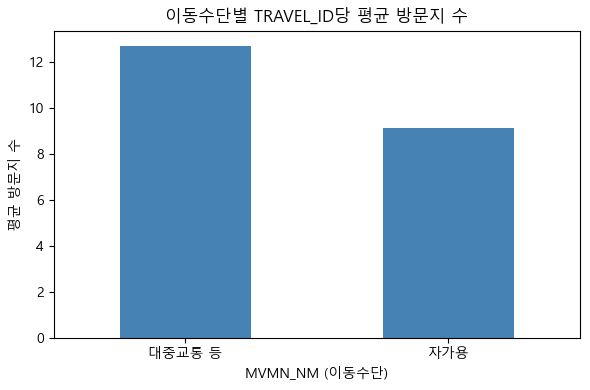

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# 2. TRAVEL_ID별 방문지 수 계산 (VISIT_ORDER 있는 것만 셈)
visit_counts = (
    df[df['VISIT_ORDER'].notna()]
    .groupby('TRAVEL_ID')['VISIT_ORDER']
    .count()
    .reset_index()
    .rename(columns={'VISIT_ORDER': '방문지수'})
)

# 3. TRAVEL_ID별 이동수단 대표값 가져오기 (MVMN_NM 최빈값)
mode_per_travel = (
    df[df['MVMN_NM'].notna()]
    .groupby('TRAVEL_ID')['MVMN_NM']
    .agg(lambda x: x.value_counts().idxmax())
    .reset_index()
)

# 4. 병합: TRAVEL_ID에 따라 방문지 수 + 이동수단
merged = pd.merge(visit_counts, mode_per_travel, on='TRAVEL_ID')

# 5. 이동수단별 TRAVEL_ID 수 확인
travel_id_count = merged['MVMN_NM'].value_counts()

# 6. 이동수단별 TRAVEL_ID당 평균 방문지 수
avg_visits = merged.groupby('MVMN_NM')['방문지수'].mean()

# 7. 결과 출력
print("📌 이동수단별 TRAVEL_ID 개수:")
print(travel_id_count)
print("\n📊 이동수단별 TRAVEL_ID당 평균 방문지 수:")
print(avg_visits)

# 8. 시각화: 평균 방문지 수
plt.figure(figsize=(6, 4))
avg_visits.plot(kind='bar', color='steelblue')
plt.title("이동수단별 TRAVEL_ID당 평균 방문지 수")
plt.xlabel("MVMN_NM (이동수단)")
plt.ylabel("평균 방문지 수")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\147573817.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


📌 TRAVEL_ID별 VISIT_ORDER 수 요약:
count    4000.000000
mean       10.401750
std         5.720448
min         1.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        48.000000
Name: VISIT_ORDER, dtype: float64


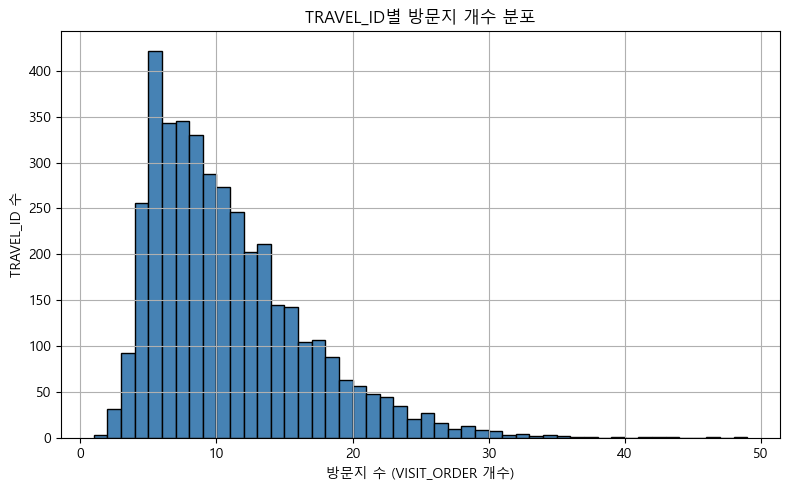


🔢 방문지 수별 TRAVEL_ID 개수:
VISIT_ORDER
1       3
2      31
3      92
4     256
5     422
6     343
7     345
8     330
9     288
10    273
11    246
12    202
13    211
14    145
15    143
16    104
17    107
18     88
19     63
20     56
21     48
22     45
23     35
24     21
25     27
26     16
27     10
28     13
29      8
30      7
31      3
32      4
33      2
34      3
35      2
36      1
37      1
39      1
41      1
42      1
43      1
46      1
48      1
Name: count, dtype: int64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# 2. VISIT_ORDER가 있는 경우만 필터링
filtered = df[df['VISIT_ORDER'].notna()]

# 3. TRAVEL_ID별 VISIT_ORDER 개수 세기
visit_order_counts = filtered.groupby('TRAVEL_ID')['VISIT_ORDER'].count()

# 4. 간단한 통계 요약
print("📌 TRAVEL_ID별 VISIT_ORDER 수 요약:")
print(visit_order_counts.describe())

# 5. 히스토그램 시각화 (방문지 개수 분포)
plt.figure(figsize=(8, 5))
visit_order_counts.hist(bins=range(1, visit_order_counts.max()+2), color='steelblue', edgecolor='black')
plt.title("TRAVEL_ID별 방문지 개수 분포")
plt.xlabel("방문지 수 (VISIT_ORDER 개수)")
plt.ylabel("TRAVEL_ID 수")
plt.tight_layout()
plt.show()

# 6. 방문지 수별 TRAVEL_ID 개수 출력
print("\n🔢 방문지 수별 TRAVEL_ID 개수:")
print(visit_order_counts.value_counts().sort_index())

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\987644319.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


<Figure size 1000x600 with 0 Axes>

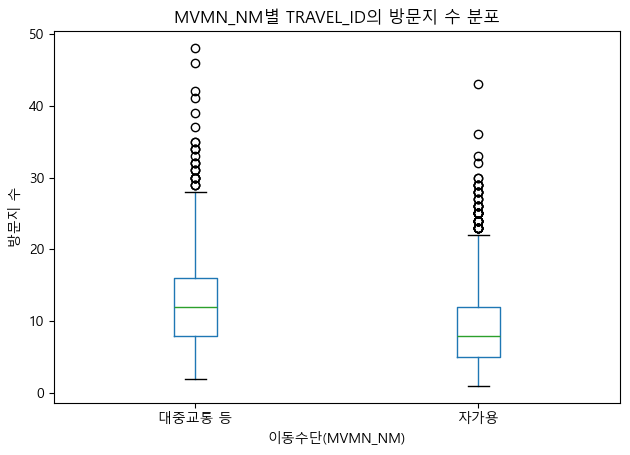

🔢 MVMN_NM별 TRAVEL_ID 수:
MVMN_NM
자가용       2598
대중교통 등    1401
Name: count, dtype: int64


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# 2. VISIT_ORDER 결측 제거
df_visits = df[df['VISIT_ORDER'].notna()].copy()

# 3. TRAVEL_ID별 방문지 수 계산
visit_counts = (
    df_visits.groupby('TRAVEL_ID')['VISIT_ORDER']
    .count()
    .reset_index()
    .rename(columns={'VISIT_ORDER': '방문지수'})
)

# 4. 각 TRAVEL_ID에 대응하는 MVMN_NM 추출 (고유값이므로 첫 번째 값 사용)
travel_modes = (
    df_visits.groupby('TRAVEL_ID')['MVMN_NM']
    .first()
    .reset_index()
)

# 5. 병합
merged = pd.merge(visit_counts, travel_modes, on='TRAVEL_ID')

# 6. 시각화
plt.figure(figsize=(10, 6))
merged.boxplot(column='방문지수', by='MVMN_NM', grid=False)
plt.title("MVMN_NM별 TRAVEL_ID의 방문지 수 분포")
plt.suptitle("")  # 상단 타이틀 제거
plt.xlabel("이동수단(MVMN_NM)")
plt.ylabel("방문지 수")
plt.tight_layout()
plt.show()

# 7. 각 이동수단에 해당하는 TRAVEL_ID 개수 출력
print("🔢 MVMN_NM별 TRAVEL_ID 수:")
print(merged['MVMN_NM'].value_counts())

7. 좌표 결측치 채우기

In [40]:
import pandas as pd

# 💾 1. 통합 데이터 불러오기
merged = pd.read_csv("전체통합_MVMN_NM보완.csv")

# X_COORD, Y_COORD 결측치 개수 확인
missing_x = df['X_COORD'].isna().sum()
missing_y = df['Y_COORD'].isna().sum()
print(f"📌 X_COORD 결측치 수: {missing_x}")
print(f"📌 Y_COORD 결측치 수: {missing_y}")

# 💾 2. POI 마스터 파일 (필요한 열만) 불러오기
use_cols = ['POI_ID', 'POI_NM', 'X_COORD', 'Y_COORD']
ts_poi_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Training/01.원천데이터/TS_csv/tn_poi_master_POIMaster.csv"
vs_poi_path = r"C:/Users/Owner/Desktop/MINIPROJECT_LOCAL/data/01-1.정식개방데이터/Validation/01.원천데이터/VS_csv/tn_poi_master_POIMaster.csv"

ts_poi = pd.read_csv(ts_poi_path, usecols=use_cols)
vs_poi = pd.read_csv(vs_poi_path, usecols=use_cols)

# 🧹 3. 중복 제거
ts_poi_id = ts_poi.drop_duplicates(subset='POI_ID')
vs_poi_id = vs_poi.drop_duplicates(subset='POI_ID')
ts_poi_nm = ts_poi.drop_duplicates(subset='POI_NM')
vs_poi_nm = vs_poi.drop_duplicates(subset='POI_NM')

# 🧱 4. 보완용 인덱스 생성
poi_sources = [
    (ts_poi_id.set_index('POI_ID'), 'POI_ID'),
    (vs_poi_id.set_index('POI_ID'), 'POI_ID'),
    (ts_poi_nm.set_index('POI_NM'), 'POI_NM'),
    (vs_poi_nm.set_index('POI_NM'), 'POI_NM')
]

# 🛠 5. 결측 좌표 보완
for source_df, key in poi_sources:
    if key == 'POI_ID':
        merged['X_COORD'] = merged['X_COORD'].fillna(merged['POI_ID'].map(source_df['X_COORD']))
        merged['Y_COORD'] = merged['Y_COORD'].fillna(merged['POI_ID'].map(source_df['Y_COORD']))
    else:
        merged['X_COORD'] = merged['X_COORD'].fillna(merged['POI_NM'].map(source_df['X_COORD']))
        merged['Y_COORD'] = merged['Y_COORD'].fillna(merged['POI_NM'].map(source_df['Y_COORD']))

# ✅ 6. 결과 저장
merged.to_csv("전체통합_모두보완.csv", index=False, encoding='utf-8-sig')
print("📍 좌표 보완 완료 → 전체통합_모두보완.csv")
print("📌 남은 X좌표 결측치 수:", merged['X_COORD'].isna().sum())
print("📌 남은 Y좌표 결측치 수:", merged['Y_COORD'].isna().sum())

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\2265741186.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  merged = pd.read_csv("전체통합_MVMN_NM보완.csv")


📌 X_COORD 결측치 수: 8081
📌 Y_COORD 결측치 수: 8081
📍 좌표 보완 완료 → 전체통합_모두보완.csv
📌 남은 X좌표 결측치 수: 293
📌 남은 Y좌표 결측치 수: 293


In [41]:
import pandas as pd

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_모두보완.csv")

# 2. VISIT_ORDER 결측 제거 및 정렬
df_clean = df[df['VISIT_ORDER'].notna()].copy()
df_clean['VISIT_ORDER'] = df_clean['VISIT_ORDER'].astype(int)
df_clean = df_clean.sort_values(by=['TRAVEL_ID', 'VISIT_ORDER'])

# 3. 그룹별로 연속 여부 판단
def check_visit_order(group):
    visit_orders = group['VISIT_ORDER'].tolist()
    expected = list(range(1, len(visit_orders) + 1))
    return visit_orders == expected

# 4. 결과 집계
grouped = df_clean.groupby('TRAVEL_ID')
results = grouped.apply(check_visit_order)

# 5. 출력
not_continuous = results[~results].index.tolist()
print(f"✅ 총 TRAVEL_ID 수: {len(results)}")
print(f"🎯 VISIT_ORDER가 1부터 연속적인 TRAVEL_ID 수: {results.sum()}")
print(f"🚨 연속되지 않은 TRAVEL_ID 수: {(~results).sum()}")
if not_continuous:
    print("📌 연속되지 않은 TRAVEL_ID 예시:", not_continuous[:10])

C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\1341639569.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_모두보완.csv")


✅ 총 TRAVEL_ID 수: 4000
🎯 VISIT_ORDER가 1부터 연속적인 TRAVEL_ID 수: 1560
🚨 연속되지 않은 TRAVEL_ID 수: 2440
📌 연속되지 않은 TRAVEL_ID 예시: ['a_a000193', 'a_a000330', 'a_a000423', 'a_a000594', 'a_a001011', 'a_a001481', 'a_a001928', 'a_a002265', 'a_a002311', 'a_a003054']


C:\Users\Owner\AppData\Local\Temp\ipykernel_14084\1341639569.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = grouped.apply(check_visit_order)


발표용
방문지수가 5개, 연속적으로 이어진 TRAVEL_ID를 2개 뽑을 예정(자가용 1개, 대중교통 등 1개)

In [6]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("전체통합_모두보완.csv")

# VISIT_ORDER 결측 제거 + 정수형으로 변환
df = df[df['VISIT_ORDER'].notna()]
df['VISIT_ORDER'] = df['VISIT_ORDER'].astype(int)

# VISIT_ORDER가 8개이면서 1부터 8까지 연속인 TRAVEL_ID만 필터링
def is_sequential(group):
    orders = sorted(group['VISIT_ORDER'].tolist())
    return orders == list(range(1, 9))  # 1~8 연속

valid_travel_ids = (
    df.groupby('TRAVEL_ID')
    .filter(lambda g: len(g) == 8 and is_sequential(g))
)

# 자가용에서 1개 추출
sample_car = valid_travel_ids[valid_travel_ids['MVMN_NM'] == '자가용']['TRAVEL_ID'].drop_duplicates().head(1).values

# 대중교통 등에서 1개 추출
sample_public = valid_travel_ids[valid_travel_ids['MVMN_NM'] == '대중교통 등']['TRAVEL_ID'].drop_duplicates().head(1).values

print("✅ 자가용 샘플 TRAVEL_ID:", sample_car[0] if len(sample_car) > 0 else "없음")
print("✅ 대중교통 등 샘플 TRAVEL_ID:", sample_public[0] if len(sample_public) > 0 else "없음")

C:\Users\Owner\AppData\Local\Temp\ipykernel_18876\851704217.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_모두보완.csv")


✅ 자가용 샘플 TRAVEL_ID: a_a007601
✅ 대중교통 등 샘플 TRAVEL_ID: a_a001630


In [ ]:
!pip install folium

In [7]:
import pandas as pd
import folium
from folium import PolyLine, Marker

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# 2. 샘플 ID 선택 (자가용 또는 대중교통 등)
sample_id = 'a_a007601' 

# 3. 해당 TRAVEL_ID의 방문지 정보만 추출
sub = df[df['TRAVEL_ID'] == sample_id].copy()
sub = sub.sort_values('VISIT_ORDER')

# 4. 좌표를 숫자형으로 변환
sub['X_COORD'] = pd.to_numeric(sub['X_COORD'], errors='coerce')
sub['Y_COORD'] = pd.to_numeric(sub['Y_COORD'], errors='coerce')

# 5. NaN 제거 (좌표 없는 경우 시각화 제외)
sub = sub.dropna(subset=['X_COORD', 'Y_COORD'])

# 6. 중심 좌표 설정
center = [sub['Y_COORD'].mean(), sub['X_COORD'].mean()]
fmap = folium.Map(location=center, zoom_start=13)

# 7. 선 연결
coords = list(zip(sub['Y_COORD'], sub['X_COORD']))
folium.PolyLine(coords, color='blue').add_to(fmap)

# 8. 마커 추가
for idx, row in sub.iterrows():
    folium.Marker(
        location=[row['Y_COORD'], row['X_COORD']],
        popup=f"{row['VISIT_ORDER']}번 방문지\n{row['POI_NM']}",
        icon=folium.Icon(color="green")
    ).add_to(fmap)

# 9. 지도 출력 (또는 저장)
fmap.save("sample_route_map3.html")  # 필요 시 HTML로 저장

C:\Users\Owner\AppData\Local\Temp\ipykernel_18876\72247109.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


In [8]:
import pandas as pd
import folium
from folium import PolyLine, Marker

# 1. 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# 2. 샘플 ID 선택 (자가용 또는 대중교통 등)
sample_id = 'a_a001630'

# 3. 해당 TRAVEL_ID의 방문지 정보만 추출
sub = df[df['TRAVEL_ID'] == sample_id].copy()
sub = sub.sort_values('VISIT_ORDER')

# 4. 좌표를 숫자형으로 변환
sub['X_COORD'] = pd.to_numeric(sub['X_COORD'], errors='coerce')
sub['Y_COORD'] = pd.to_numeric(sub['Y_COORD'], errors='coerce')

# 5. NaN 제거 (좌표 없는 경우 시각화 제외)
sub = sub.dropna(subset=['X_COORD', 'Y_COORD'])

# 6. 중심 좌표 설정
center = [sub['Y_COORD'].mean(), sub['X_COORD'].mean()]
fmap = folium.Map(location=center, zoom_start=13)

# 7. 선 연결
coords = list(zip(sub['Y_COORD'], sub['X_COORD']))
folium.PolyLine(coords, color='blue').add_to(fmap)

# 8. 마커 추가
for idx, row in sub.iterrows():
    folium.Marker(
        location=[row['Y_COORD'], row['X_COORD']],
        popup=f"{row['VISIT_ORDER']}번 방문지\n{row['POI_NM']}",
        icon=folium.Icon(color="green")
    ).add_to(fmap)

# 9. 지도 출력 (또는 저장)
fmap.save("sample_route_map4.html")  # 필요 시 HTML로 저장

C:\Users\Owner\AppData\Local\Temp\ipykernel_18876\2273897373.py:6: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


In [ ]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("전체통합_MVMN_NM보완.csv")

# TRAVEL_ID별 MVMN_NM 고유값 집계
unique_mvmn_by_travel = df[['TRAVEL_ID', 'MVMN_NM']].drop_duplicates()

# 분포 확인
value_counts = unique_mvmn_by_travel['MVMN_NM'].value_counts(dropna=False)
print("🔢 TRAVEL_ID 단위로 본 MVMN_NM 분포:")
print(value_counts)

# 자가용과 대중교통 등 개수만 따로 보기
car_count = value_counts.get("자가용", 0)
public_count = value_counts.get("대중교통 등", 0)
print(f"\n🚗 자가용 여행: {car_count}개")
print(f"🚌 대중교통 등 여행: {public_count}개")

# 결측치 개수
missing_count = unique_mvmn_by_travel['MVMN_NM'].isna().sum()
print(f"\n❗ 결측치 여행: {missing_count}개")

# 이상치: 예상 값 외 다른 값
expected_values = ["자가용", "대중교통 등"]
unexpected = unique_mvmn_by_travel[~unique_mvmn_by_travel['MVMN_NM'].isin(expected_values) & unique_mvmn_by_travel['MVMN_NM'].notna()]
print(f"\n⚠️ 이상치 여행: {len(unexpected)}개 (종류 {unexpected['MVMN_NM'].nunique()}종)")
if not unexpected.empty:
    print("이상치 예시:")
    print(unexpected['MVMN_NM'].value_counts())

🔢 TRAVEL_ID 단위로 본 MVMN_NM 분포:
MVMN_NM
자가용       2598
대중교통 등    1401
NaN          1
Name: count, dtype: int64

🚗 자가용 여행: 2598개
🚌 대중교통 등 여행: 1401개

❗ 결측치 여행: 1개

⚠️ 이상치 여행: 0개 (종류 0종)


C:\Users\Owner\AppData\Local\Temp\ipykernel_18876\2515729297.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_MVMN_NM보완.csv")


방문지수 3개 이하 제거

In [1]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("전체통합_모두보완.csv")

# TRAVEL_ID별 방문지 수 계산
visit_counts = df.groupby('TRAVEL_ID')['VISIT_ORDER'].count()

# 방문지 수가 3개 초과인 TRAVEL_ID만 추출
valid_travel_ids = visit_counts[visit_counts > 3].index

# 필터링
df_filtered = df[df['TRAVEL_ID'].isin(valid_travel_ids)].copy()

# CSV 파일로 저장
df_filtered.to_csv("통합_모두보완_3개이하제거.csv", index=False, encoding='utf-8-sig')

# 확인 메시지
print("✅ 저장 완료: 통합_모두보완_3개이하제거.csv")
print(f"남은 TRAVEL_ID 수: {df_filtered['TRAVEL_ID'].nunique()}")
print(f"남은 데이터 행 수: {len(df_filtered)}")

C:\Users\Owner\AppData\Local\Temp\ipykernel_19008\1442123796.py:4: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("전체통합_모두보완.csv")


✅ 저장 완료: 통합_모두보완_3개이하제거.csv
남은 TRAVEL_ID 수: 3874
남은 데이터 행 수: 41266


방문순서 오름차순으로
슬라이딩윈도우 기법
각도계산
각도 B에 넣음(ABC에서)

In [3]:
import pandas as pd
import numpy as np

# 파일 불러오기
df = pd.read_csv("통합_모두보완_3개이하제거.csv")

# 좌표 컬럼을 float 타입으로 강제 변환
df['X_COORD'] = pd.to_numeric(df['X_COORD'], errors='coerce')
df['Y_COORD'] = pd.to_numeric(df['Y_COORD'], errors='coerce')

# 각도 저장을 위한 새로운 컬럼 생성
df['ANGLE_DEGREE'] = np.nan  # 초기에는 전부 NaN

# 함수: 세 점 간 각도 계산 (단위: degree)
def calculate_angle(A, B, C):
    # 벡터 AB, BC
    vec_AB = [B[0] - A[0], B[1] - A[1]]
    vec_BC = [C[0] - B[0], C[1] - B[1]]

    # 벡터 크기
    norm_AB = np.linalg.norm(vec_AB)
    norm_BC = np.linalg.norm(vec_BC)

    if norm_AB == 0 or norm_BC == 0:
        return np.nan  # 거리 0이면 각도 계산 불가

    # 내적 및 각도 계산
    dot_product = np.dot(vec_AB, vec_BC)
    cos_angle = dot_product / (norm_AB * norm_BC)
    # 안전하게 클리핑 (float 정밀도 오류 방지)
    cos_angle = np.clip(cos_angle, -1.0, 1.0)
    angle_rad = np.arccos(cos_angle)
    angle_deg = np.degrees(angle_rad)
    return angle_deg

# 그룹별 처리
result_list = []

for travel_id, group in df.groupby('TRAVEL_ID'):
    group_sorted = group.sort_values('VISIT_ORDER').reset_index(drop=True)

    for i in range(1, len(group_sorted) - 1):
        A = group_sorted.loc[i - 1, ['X_COORD', 'Y_COORD']].values
        B = group_sorted.loc[i, ['X_COORD', 'Y_COORD']].values
        C = group_sorted.loc[i + 1, ['X_COORD', 'Y_COORD']].values

        angle = calculate_angle(A, B, C)
        group_sorted.loc[i, 'ANGLE_DEGREE'] = angle

    result_list.append(group_sorted)

# 다시 하나의 데이터프레임으로 병합
df_angle = pd.concat(result_list, ignore_index=True)

# 확인
print("✅ 각도 계산 완료")
print(df_angle[['TRAVEL_ID', 'VISIT_ORDER', 'ANGLE_DEGREE']].dropna().head())

# 필요시 저장
df_angle.to_csv("통합_전체보완_각도계산완료.csv", index=False, encoding='utf-8-sig')

C:\Users\Owner\AppData\Local\Temp\ipykernel_19008\1992403455.py:5: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("통합_모두보완_3개이하제거.csv")


✅ 각도 계산 완료
   TRAVEL_ID  VISIT_ORDER  ANGLE_DEGREE
1  a_a000155            2     42.192218
2  a_a000155            3    147.502859
6  a_a000155            7    179.999999
7  a_a000155            8     29.825633
8  a_a000155            9    180.000000


같은 방문지에 있었던 경우 각도값이 결측치로 뜸

✅ 추천 방식: "그대로 두고 진행하되, 분석할 때 NaN은 제외하고 개수 세기"
왜?
분석의 일관성 유지 (TRAVEL_ID별 방문지 수 그대로 유지)
계산 가능한 변곡점 수만으로 개수 및 밀도 계산
NaN의 의미도 분석적으로 해석 가능 → "연속된 동일지점 방문은 변곡을 유발하지 않는다"

첫방문지와 마지막 방문지 제외한 각도 결측치 몇 개인지 보고
각도 분포 보기

❗ 내부 결측치(동일 위치 등으로 인한 각도 계산 불가): 1471개
🔎 ANGLE_DEGREE 전체 결측치: 9219개
📌 그 중 내부 결측치 비율: 1471 / 9219 = 15.96%


c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54693 (\N{HANGUL SYLLABLE HYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io,

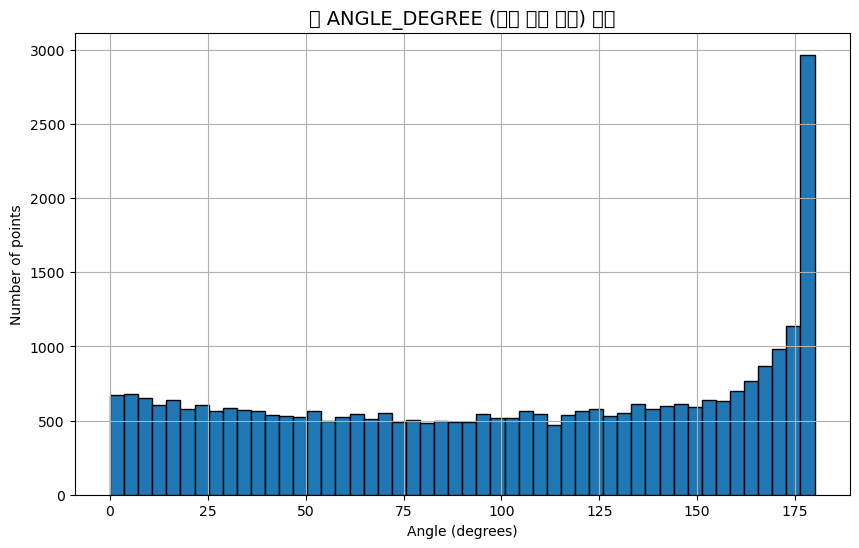

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 파일 불러오기
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# 1. TRAVEL_ID별 첫/마지막 VISIT_ORDER 구하기
group = df.groupby('TRAVEL_ID')['VISIT_ORDER']
first_visit = group.transform('min')
last_visit = group.transform('max')

# 2. 각도값이 NaN이면서 첫/마지막 방문이 아닌 경우만 추출
internal_nan = df[
    df['ANGLE_DEGREE'].isna() & 
    (df['VISIT_ORDER'] != first_visit) & 
    (df['VISIT_ORDER'] != last_visit)
]

print(f"❗ 내부 결측치(동일 위치 등으로 인한 각도 계산 불가): {len(internal_nan)}개")

# 3. 전체 ANGLE_DEGREE NaN 개수 (참고)
total_nan = df['ANGLE_DEGREE'].isna().sum()
print(f"🔎 ANGLE_DEGREE 전체 결측치: {total_nan}개")
print(f"📌 그 중 내부 결측치 비율: {len(internal_nan)} / {total_nan} = {len(internal_nan)/total_nan:.2%}")

# 4. ANGLE_DEGREE 분포 시각화
plt.figure(figsize=(10,6))
df['ANGLE_DEGREE'].dropna().hist(bins=50, edgecolor='black')
plt.title("🎯 ANGLE_DEGREE (방향 변화 각도) 분포", fontsize=14)
plt.xlabel("Angle (degrees)")
plt.ylabel("Number of points")
plt.grid(True)
plt.show()

In [5]:
# NaN 제외한 각도값만 추출
angles = df['ANGLE_DEGREE'].dropna()

# 기본 통계
summary = {
    '총 개수': len(angles),
    '평균': angles.mean(),
    '중앙값': angles.median(),
    '표준편차': angles.std(),
    '최소값': angles.min(),
    '30% 분위수': angles.quantile(0.3),
    '70% 분위수': angles.quantile(0.7),
    '90% 분위수': angles.quantile(0.9),
    '최대값': angles.max(),
}

# 보기 좋게 출력
print("📊 ANGLE_DEGREE 통계 요약:")
for k, v in summary.items():
    print(f"{k:>10}: {v:.2f}")

📊 ANGLE_DEGREE 통계 요약:
      총 개수: 32047.00
        평균: 100.29
       중앙값: 104.33
      표준편차: 57.55
       최소값: 0.01
   30% 분위수: 59.14
   70% 분위수: 145.76
   90% 분위수: 175.76
       최대값: 180.00


60도, 90도, 120도에 따라 각각 변곡점을 잡음

In [7]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# 변곡점 기준 각도별로 컬럼 생성
df['IS_INFLECT_60'] = df['ANGLE_DEGREE'] >= 60
df['IS_INFLECT_90'] = df['ANGLE_DEGREE'] >= 90
df['IS_INFLECT_120'] = df['ANGLE_DEGREE'] >= 120

# 전체 개수 비교
print("📊 전체 변곡점 개수 (NaN 제외 기준):")
print(f"60도 이상:  {df['IS_INFLECT_60'].sum()}개")
print(f"90도 이상:  {df['IS_INFLECT_90'].sum()}개")
print(f"120도 이상: {df['IS_INFLECT_120'].sum()}개")

# TRAVEL_ID별 변곡점 개수 요약
inflection_counts = df.groupby('TRAVEL_ID')[
    ['IS_INFLECT_60', 'IS_INFLECT_90', 'IS_INFLECT_120']
].sum()

# 컬럼명 변경 (가독성)
inflection_counts.columns = ['INFLECT_60_CNT', 'INFLECT_90_CNT', 'INFLECT_120_CNT']

# 결과 일부 확인
print("\n🧾 TRAVEL_ID별 변곡점 개수 (상위 5개):")
print(inflection_counts.head())

# TRAVEL_ID별 변곡점 개수를 저장하고 싶다면
inflection_counts.to_csv("TRAVEL별_변곡점개수비교.csv", encoding='utf-8-sig')

📊 전체 변곡점 개수 (NaN 제외 기준):
60도 이상:  22316개
90도 이상:  18087개
120도 이상: 13708개

🧾 TRAVEL_ID별 변곡점 개수 (상위 5개):
           INFLECT_60_CNT  INFLECT_90_CNT  INFLECT_120_CNT
TRAVEL_ID                                                 
a_a000155               7               6                3
a_a000193              15              14               12
a_a000316              10              10                8
a_a000330              12               7                3
a_a000423               3               3                1


각 기준 각도(60, 90, 120도)에 대해 변곡점 개수
변곡점 밀도 = 변곡점 개수 / (방문지 수 - 2)
이동수단(MVMN_NM)별로 비교

In [7]:
import pandas as pd

# 파일 불러오기
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# 기준별 변곡점 여부
df['IS_INFLECT_60'] = df['ANGLE_DEGREE'] >= 60
df['IS_INFLECT_90'] = df['ANGLE_DEGREE'] >= 90
df['IS_INFLECT_120'] = df['ANGLE_DEGREE'] >= 120

# TRAVEL_ID별 방문지 수
visit_counts = df.groupby('TRAVEL_ID')['VISIT_ORDER'].count()

# TRAVEL_ID별 변곡점 개수
inflection_counts = df.groupby('TRAVEL_ID')[['IS_INFLECT_60','IS_INFLECT_90','IS_INFLECT_120']].sum()

# 밀도 계산
inflection_counts['DENSITY_60'] = inflection_counts['IS_INFLECT_60'] / (visit_counts - 2)
inflection_counts['DENSITY_90'] = inflection_counts['IS_INFLECT_90'] / (visit_counts - 2)
inflection_counts['DENSITY_120'] = inflection_counts['IS_INFLECT_120'] / (visit_counts - 2)

# 이동수단 매핑
mode_map = df.groupby('TRAVEL_ID')['MVMN_NM'].first()
inflection_counts['MVMN_NM'] = mode_map

# (1) 전체 TRAVEL_ID 변곡점 개수 분포
print("\n📊 전체 TRAVEL_ID 변곡점 개수 분포 요약")
for col in ['IS_INFLECT_60', 'IS_INFLECT_90', 'IS_INFLECT_120']:
    stats = inflection_counts[col].agg(['mean','median','min','max'])
    print(f"{col}: 평균={stats['mean']:.2f}, 중앙값={stats['median']}, 최소={stats['min']}, 최대={stats['max']}")

# (2) 전체 TRAVEL_ID 변곡점 밀도 분포
print("\n📊 전체 TRAVEL_ID 변곡점 밀도 분포 요약")
for col in ['DENSITY_60', 'DENSITY_90', 'DENSITY_120']:
    stats = inflection_counts[col].agg(['mean','median','min','max'])
    print(f"{col}: 평균={stats['mean']:.3f}, 중앙값={stats['median']:.3f}, 최소={stats['min']:.3f}, 최대={stats['max']:.3f}")



📊 전체 TRAVEL_ID 변곡점 개수 분포 요약
IS_INFLECT_60: 평균=5.76, 중앙값=5.0, 최소=0.0, 최대=32.0
IS_INFLECT_90: 평균=4.67, 중앙값=4.0, 최소=0.0, 최대=26.0
IS_INFLECT_120: 평균=3.54, 중앙값=3.0, 최소=0.0, 최대=21.0

📊 전체 TRAVEL_ID 변곡점 밀도 분포 요약
DENSITY_60: 평균=0.661, 중앙값=0.667, 최소=0.000, 최대=1.000
DENSITY_90: 평균=0.534, 중앙값=0.500, 최소=0.000, 최대=1.000
DENSITY_120: 평균=0.400, 중앙값=0.400, 최소=0.000, 최대=1.000


In [6]:
# (3) 이동수단별 변곡점 개수 요약
print("\n🚌🚗 이동수단별 변곡점 개수 요약")
for col in ['IS_INFLECT_60', 'IS_INFLECT_90', 'IS_INFLECT_120']:
    print(f"\n--- {col} ---")
    mode_stats = inflection_counts.groupby('MVMN_NM')[col].agg(['mean','median','min','max'])
    print(mode_stats)



🚌🚗 이동수단별 변곡점 개수 요약

--- IS_INFLECT_60 ---
             mean  median  min  max
MVMN_NM                            
대중교통 등   7.368421     7.0    0   32
자가용      4.863691     4.0    0   30

--- IS_INFLECT_90 ---
             mean  median  min  max
MVMN_NM                            
대중교통 등   5.944484     5.0    0   26
자가용      3.957378     3.0    0   26

--- IS_INFLECT_120 ---
             mean  median  min  max
MVMN_NM                            
대중교통 등   4.509733     4.0    0   21
자가용      2.996783     2.0    0   17


In [8]:
# (4) 이동수단별 변곡점 밀도 요약
print("\n🚌🚗 이동수단별 변곡점 밀도 요약")
for col in ['DENSITY_60', 'DENSITY_90', 'DENSITY_120']:
    print(f"\n--- {col} ---")
    mode_stats = inflection_counts.groupby('MVMN_NM')[col].agg(['mean','median','min','max'])
    print(mode_stats)


🚌🚗 이동수단별 변곡점 밀도 요약

--- DENSITY_60 ---
             mean    median  min  max
MVMN_NM                              
대중교통 등   0.681290  0.692308  0.0  1.0
자가용      0.649064  0.666667  0.0  1.0

--- DENSITY_90 ---
             mean    median  min  max
MVMN_NM                              
대중교통 등   0.550476  0.555556  0.0  1.0
자가용      0.524891  0.500000  0.0  1.0

--- DENSITY_120 ---
             mean    median  min  max
MVMN_NM                              
대중교통 등   0.414651  0.409091  0.0  1.0
자가용      0.392460  0.400000  0.0  1.0


A-C 거리 100M 에서 각도, 175도 이상인 경우 거리(왕복 기준 세우기 위해)

In [9]:
!pip install geopy

In [10]:
import pandas as pd
from geopy.distance import geodesic
import numpy as np

df = pd.read_csv("통합_전체보완_각도계산완료.csv")

results = []

for travel_id, group in df.groupby('TRAVEL_ID'):
    group = group.sort_values('VISIT_ORDER').reset_index(drop=True)

    for i in range(1, len(group) - 1):
        A = group.loc[i - 1]
        B = group.loc[i]
        C = group.loc[i + 1]

        # NaN 또는 비정상 좌표 필터링
        if not all([
            np.isfinite(A['X_COORD']), np.isfinite(A['Y_COORD']),
            np.isfinite(B['X_COORD']), np.isfinite(B['Y_COORD']),
            np.isfinite(C['X_COORD']), np.isfinite(C['Y_COORD'])
        ]):
            continue

        # A–C 거리 계산 (위도, 경도 순서로 전달)
        try:
            ac_distance = geodesic(
                (float(A['Y_COORD']), float(A['X_COORD'])),
                (float(C['Y_COORD']), float(C['X_COORD']))
            ).meters
        except ValueError:
            ac_distance = np.nan  # 계산 불가 시 NaN 처리

        results.append({
            'TRAVEL_ID': B['TRAVEL_ID'],
            'VISIT_ORDER': B['VISIT_ORDER'],
            'ANGLE_DEGREE': B['ANGLE_DEGREE'],
            'AC_DISTANCE': ac_distance
        })

# 결과 DataFrame
inflection_df = pd.DataFrame(results)

# 저장 가능
# inflection_df.to_csv("변곡점_AC거리계산.csv", index=False, encoding="utf-8-sig")
print("✅ A–C 거리 계산 완료, 총 변곡점 수:", len(inflection_df))


c:\Users\Owner\anaconda3\Lib\site-packages\geopy\point.py:472: UserWarning: Latitude normalization has been prohibited in the newer versions of geopy, because the normalized value happened to be on a different pole, which is probably not what was meant. If you pass coordinates as positional args, please make sure that the order is (latitude, longitude) or (y, x) in Cartesian terms.
  return cls(*args)


✅ A–C 거리 계산 완료, 총 변곡점 수: 33180


🟨 AC 거리 ≤ 100m인 변곡점 수: 1469개


c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\Owner\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_

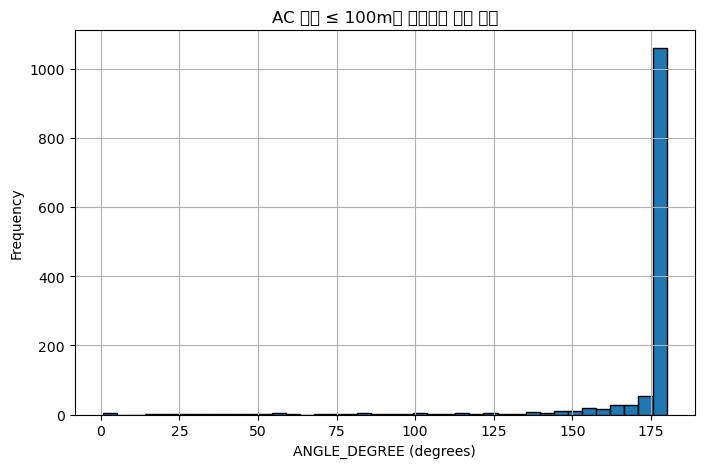

🔺 각도 ≥ 175도인 변곡점 수: 3480개


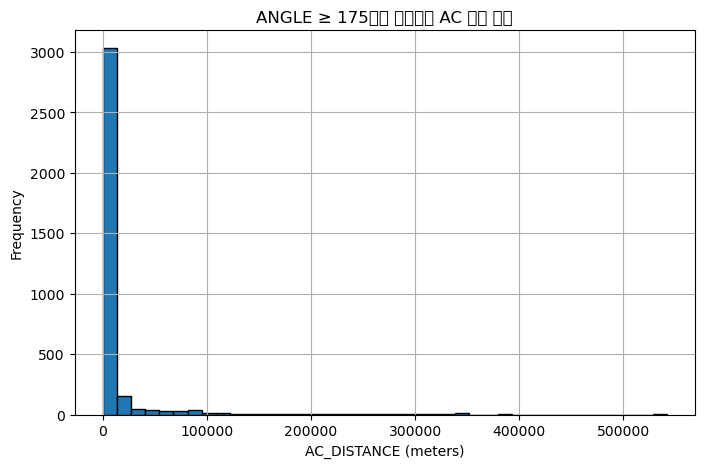

In [11]:
import matplotlib.pyplot as plt

# 1️⃣ AC_DISTANCE <= 100m 인 경우의 각도 분포
close_points = inflection_df[inflection_df['AC_DISTANCE'] <= 100]

print(f"🟨 AC 거리 ≤ 100m인 변곡점 수: {len(close_points)}개")

plt.figure(figsize=(8,5))
close_points['ANGLE_DEGREE'].dropna().hist(bins=40, edgecolor='black')
plt.title("AC 거리 ≤ 100m인 변곡점의 각도 분포")
plt.xlabel("ANGLE_DEGREE (degrees)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 2️⃣ ANGLE_DEGREE >= 175도 인 경우의 AC 거리 분포
sharp_turns = inflection_df[inflection_df['ANGLE_DEGREE'] >= 175]

print(f"🔺 각도 ≥ 175도인 변곡점 수: {len(sharp_turns)}개")

plt.figure(figsize=(8,5))
sharp_turns['AC_DISTANCE'].dropna().hist(bins=40, edgecolor='black')
plt.title("ANGLE ≥ 175도인 변곡점의 AC 거리 분포")
plt.xlabel("AC_DISTANCE (meters)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

거리 CDF + 각도 CDF 분석
-> 왕복/U턴 기준 후보값(X m, Y°) 찾기

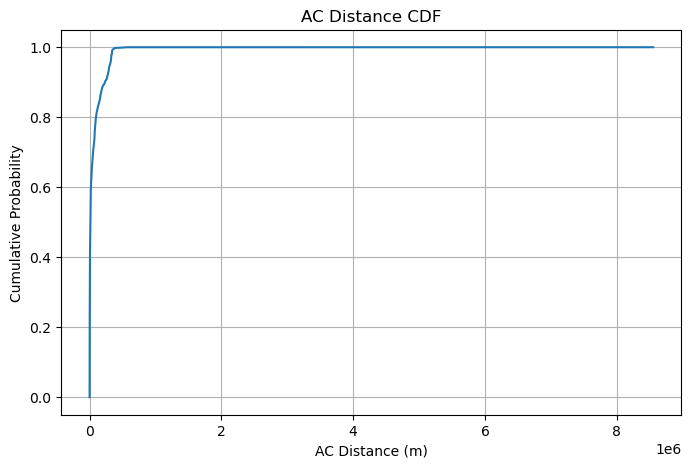

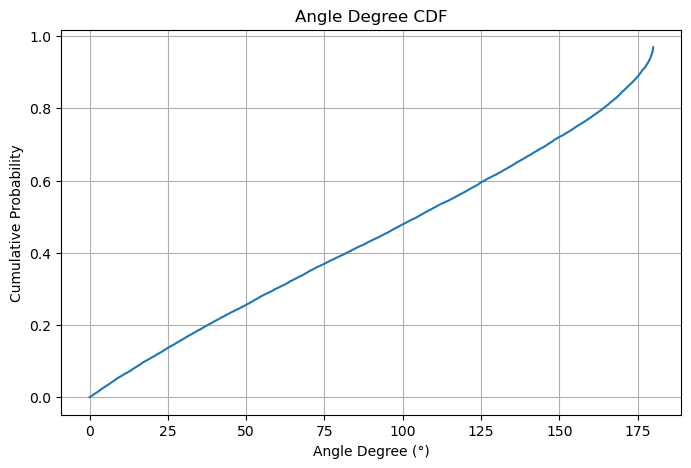

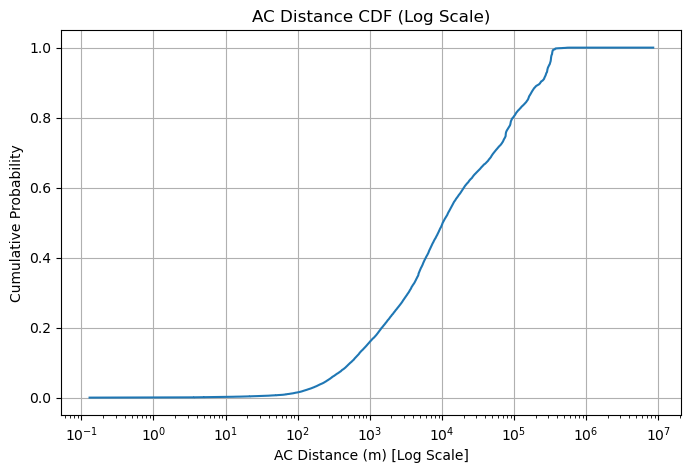

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# inflection_df: TRAVEL_ID, VISIT_ORDER, ANGLE_DEGREE, AC_DISTANCE 포함
# AC_DISTANCE <= 0 또는 NaN 제외
valid_df = inflection_df[(inflection_df['AC_DISTANCE'] > 0) & np.isfinite(inflection_df['AC_DISTANCE'])]

# 1️⃣ 거리 CDF
sorted_dist = np.sort(valid_df['AC_DISTANCE'])
cdf_dist = np.arange(1, len(sorted_dist)+1) / len(sorted_dist)

plt.figure(figsize=(8,5))
plt.plot(sorted_dist, cdf_dist)
plt.xlabel("AC Distance (m)")
plt.ylabel("Cumulative Probability")
plt.title("AC Distance CDF")
plt.grid(True)
plt.show()

# 2️⃣ 각도 CDF
sorted_angle = np.sort(valid_df['ANGLE_DEGREE'])
cdf_angle = np.arange(1, len(sorted_angle)+1) / len(sorted_angle)

plt.figure(figsize=(8,5))
plt.plot(sorted_angle, cdf_angle)
plt.xlabel("Angle Degree (°)")
plt.ylabel("Cumulative Probability")
plt.title("Angle Degree CDF")
plt.grid(True)
plt.show()

# 3️⃣ 로그 스케일로 거리 CDF (짧은 거리 확대)
plt.figure(figsize=(8,5))
plt.plot(sorted_dist, cdf_dist)
plt.xscale('log')
plt.xlabel("AC Distance (m) [Log Scale]")
plt.ylabel("Cumulative Probability")
plt.title("AC Distance CDF (Log Scale)")
plt.grid(True)
plt.show()

왕복/U턴을 판정

In [13]:
import pandas as pd
import numpy as np

# inflection_df: TRAVEL_ID, VISIT_ORDER, ANGLE_DEGREE, AC_DISTANCE 포함된 데이터프레임

# 왕복/U턴 조건 설정 (문헌+데이터 기반 후보값)
DIST_THRESHOLD = 100   # m
ANGLE_THRESHOLD = 170  # degrees

# IS_LOOP 라벨 생성
inflection_df['IS_LOOP'] = (
    (inflection_df['AC_DISTANCE'] <= DIST_THRESHOLD) &
    (inflection_df['ANGLE_DEGREE'] >= ANGLE_THRESHOLD)
)

# 왕복/U턴 개수 확인
loop_count = inflection_df['IS_LOOP'].sum()
total_count = len(inflection_df)
print(f"왕복/U턴 변곡점 수: {loop_count}개 ({loop_count/total_count:.2%} 비율)")

# 확인: 일부 행 출력
print(inflection_df[['TRAVEL_ID', 'VISIT_ORDER', 'ANGLE_DEGREE', 'AC_DISTANCE', 'IS_LOOP']].head())

# 저장 가능
inflection_df.to_csv("변곡점_왕복라벨링.csv", index=False)

왕복/U턴 변곡점 수: 1126개 (3.39% 비율)
   TRAVEL_ID  VISIT_ORDER  ANGLE_DEGREE    AC_DISTANCE  IS_LOOP
0  a_a000155            2     42.192218  151302.798846    False
1  a_a000155            3    147.502859    6370.801978    False
2  a_a000155            4           NaN       4.968559    False
3  a_a000155            5           NaN       0.000000    False
4  a_a000155            6           NaN    5542.881464    False


In [15]:
# 원본 데이터 로드
df_original = pd.read_csv("통합_전체보완_각도계산완료.csv")

# 변곡점 계산 결과 inflection_df를 원본에 병합
df_merged = df_original.merge(
    inflection_df[['TRAVEL_ID', 'VISIT_ORDER', 'ANGLE_DEGREE', 'AC_DISTANCE', 'IS_LOOP']],
    on=['TRAVEL_ID', 'VISIT_ORDER'],
    how='left'
)

# 병합된 데이터 저장
df_merged.to_csv("전체통합_변곡점포함.csv", index=False, encoding='utf-8-sig')
print("✅ 변곡점 계산 컬럼이 원본 파일에 추가되었습니다.")

✅ 변곡점 계산 컬럼이 원본 파일에 추가되었습니다.


ANGLE_DEGREE 분포에서 NaN, 0° 같은 불필요한 값 제거

누적 분포(CDF) 계산

그래프에서 기울기가 변하는 지점(Elbow point) 찾기
→ 시각적으로 보거나, knee 알고리즘으로 자동 탐지

이 값이 상대 기준 변곡점 각도

In [23]:
pip install kneed

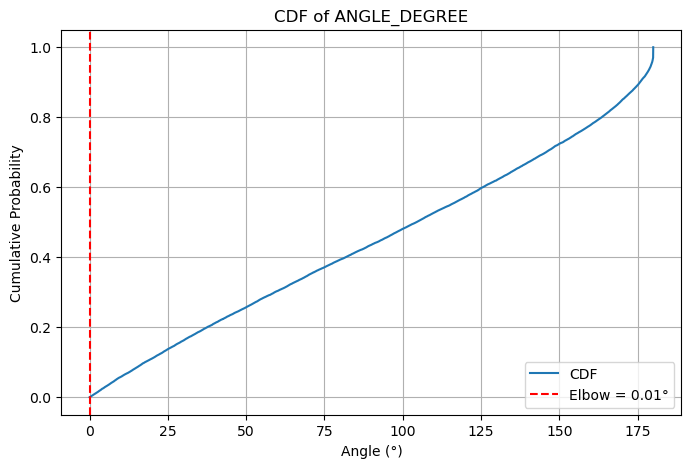

📌 데이터 기반 CDF 기준 각도: 0.01°


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

# 파일 로드
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# 각도 데이터 전처리
angles = df['ANGLE_DEGREE'].dropna()
angles = angles[angles > 0]  # 0도 제외

# 정렬
angles_sorted = np.sort(angles)

# 누적 비율
cdf = np.arange(1, len(angles_sorted)+1) / len(angles_sorted)

# Elbow point 탐지
knee_locator = KneeLocator(angles_sorted, cdf, curve='concave', direction='increasing')
elbow_angle = knee_locator.knee

# 그래프
plt.figure(figsize=(8,5))
plt.plot(angles_sorted, cdf, label='CDF')
if elbow_angle:
    plt.axvline(elbow_angle, color='red', linestyle='--', label=f'Elbow = {elbow_angle:.2f}°')
plt.xlabel('Angle (°)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of ANGLE_DEGREE')
plt.legend()
plt.grid(True)
plt.show()

print(f"📌 데이터 기반 CDF 기준 각도: {elbow_angle:.2f}°")

상위 퍼센트 각도를 사용하기로 결정(30%, 40%+문헌에서 나오는 각도도 이용할 예정)

In [26]:
import numpy as np

# NaN, 0도 제외
angles_clean = df['ANGLE_DEGREE'].dropna()
angles_clean = angles_clean[angles_clean > 0]

# 상위 퍼센트 구간별 각도 기준 계산
percentiles = [60, 65, 70, 75, 80, 85, 90]  # 하위 백분위 → 상위 40%, 35%, ...
for p in percentiles:
    value = np.percentile(angles_clean, p)
    print(f"하위 {p}% 컷 (상위 {100-p}%): {value:.2f}°")

하위 60% 컷 (상위 40%): 125.59°
하위 65% 컷 (상위 35%): 135.92°
하위 70% 컷 (상위 30%): 145.76°
하위 75% 컷 (상위 25%): 154.99°
하위 80% 컷 (상위 20%): 163.56°
하위 85% 컷 (상위 15%): 170.13°
하위 90% 컷 (상위 10%): 175.76°


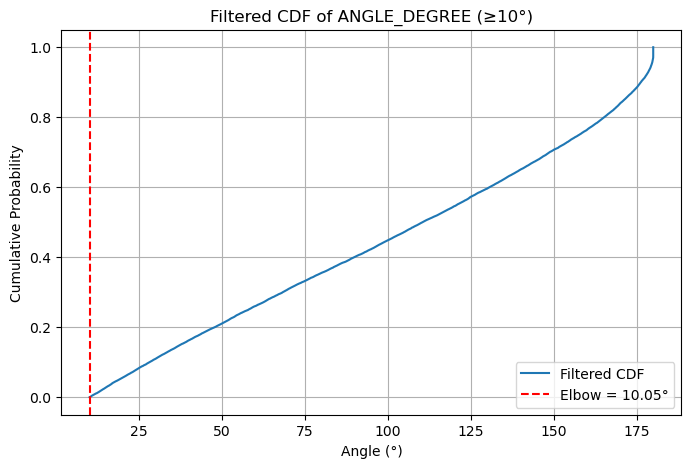

📌 데이터 기반 CDF 기준 각도(≥10° 제한): 10.05°


In [25]:
# 10도 이상 데이터만 사용해서 elbow 탐지
angles_filtered = angles_sorted[angles_sorted >= 10]
cdf_filtered = np.arange(1, len(angles_filtered)+1) / len(angles_filtered)

knee_locator = KneeLocator(angles_filtered, cdf_filtered, curve='concave', direction='increasing')
elbow_angle = knee_locator.knee

plt.figure(figsize=(8,5))
plt.plot(angles_filtered, cdf_filtered, label='Filtered CDF')
if elbow_angle:
    plt.axvline(elbow_angle, color='red', linestyle='--', label=f'Elbow = {elbow_angle:.2f}°')
plt.xlabel('Angle (°)')
plt.ylabel('Cumulative Probability')
plt.title('Filtered CDF of ANGLE_DEGREE (≥10°)')
plt.legend()
plt.grid(True)
plt.show()

print(f"📌 데이터 기반 CDF 기준 각도(≥10° 제한): {elbow_angle:.2f}°")

각 기준별(90°, 125.6°, 145.8°)

각도 기준별 3가지 버전:
왕복 포함
짧은 거리 왕복 제외 (AC_DISTANCE <= 100m & ANGLE_DEGREE >= 170°)
모든 왕복 제외 (ANGLE_DEGREE >= 170°)

변곡점 밀도 2종:
방문지수 기준
이동거리 기준

→ 그러면 총 각도기준 3 × 왕복제외 3 × 밀도방식 2 = 18개의 지표

자가용 vs 대중교통 평균·중앙값·표준편차·최대·최소 비교

한 표에서 3개 기준의 결과를 나란히 비교 가능

In [29]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic
from functools import reduce

# ----------------------
# 1. 파일 불러오기
# ----------------------
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# ----------------------
# 2. AC_DISTANCE 계산 (A–C 거리)
# ----------------------
def calc_ac_distance(group):
    group = group.sort_values('VISIT_ORDER').reset_index(drop=True)
    ac_distances = [np.nan] * len(group)
    for i in range(len(group)-2):
        A = (group.loc[i, 'Y_COORD'], group.loc[i, 'X_COORD'])
        C = (group.loc[i+2, 'Y_COORD'], group.loc[i+2, 'X_COORD'])
        if (
            np.isfinite(A[0]) and np.isfinite(A[1]) and
            np.isfinite(C[0]) and np.isfinite(C[1]) and
            -90 <= A[0] <= 90 and -180 <= A[1] <= 180 and
            -90 <= C[0] <= 90 and -180 <= C[1] <= 180
        ):
            ac_distances[i+1] = geodesic(A, C).meters
    group['AC_DISTANCE'] = ac_distances
    return group

df = df.groupby('TRAVEL_ID').apply(calc_ac_distance).reset_index(drop=True)

# ----------------------
# 3. 기준 각도 설정
# ----------------------
angle_thresholds = {
    "ABS_90": 90,        # 문헌 기준
    "PCT_40": 125.59,    # 상위 40%
    "PCT_30": 145.76     # 상위 30%
}

# ----------------------
# 4. TRAVEL_ID별 방문지 수
# ----------------------
visit_counts = df.groupby('TRAVEL_ID')['VISIT_ORDER'].nunique()

# ----------------------
# 5. 총 이동거리 계산 (km)
# ----------------------
def total_distance(group):
    coords = group[['Y_COORD', 'X_COORD']].values
    dist = 0.0
    for i in range(len(coords)-1):
        if (
            np.isfinite(coords[i][0]) and np.isfinite(coords[i][1]) and
            np.isfinite(coords[i+1][0]) and np.isfinite(coords[i+1][1]) and
            -90 <= coords[i][0] <= 90 and -180 <= coords[i][1] <= 180 and
            -90 <= coords[i+1][0] <= 90 and -180 <= coords[i+1][1] <= 180
        ):
            dist += geodesic(coords[i], coords[i+1]).meters
    return dist / 1000  # km

travel_distances = df.groupby('TRAVEL_ID').apply(total_distance)

# ----------------------
# 6. 왕복 라벨 생성
# ----------------------
df['IS_LOOP_SHORT'] = (
    (df['AC_DISTANCE'] <= 100) &
    (df['ANGLE_DEGREE'] >= 170)
)
df['IS_LOOP_ALL'] = (df['ANGLE_DEGREE'] >= 170)

# ----------------------
# 7. 주요 이동수단 매핑
# ----------------------
mode_map = df.groupby('TRAVEL_ID')['MVMN_NM'].first()

# ----------------------
# 8. 결과 저장
# ----------------------
results = []

for label, threshold in angle_thresholds.items():
    for loop_type in ["INCL", "EXCL_SHORT", "EXCL_ALL"]:
        if loop_type == "INCL":
            cond = lambda g: (g['ANGLE_DEGREE'] >= threshold)
        elif loop_type == "EXCL_SHORT":
            cond = lambda g: ((g['ANGLE_DEGREE'] >= threshold) & (~g['IS_LOOP_SHORT']))
        elif loop_type == "EXCL_ALL":
            cond = lambda g: ((g['ANGLE_DEGREE'] >= threshold) & (~g['IS_LOOP_ALL']))

        counts = df.groupby('TRAVEL_ID').apply(lambda g: cond(g).sum())
        density_visit = counts / (visit_counts - 2)
        density_dist = counts / travel_distances

        temp_df = pd.DataFrame({
            'TRAVEL_ID': counts.index,
            'MVMN_NM': counts.index.map(mode_map),
            f'INFLECT_{label}_{loop_type}': counts.values,
            f'DENSITY_{label}_{loop_type}_VISIT': density_visit.values,
            f'DENSITY_{label}_{loop_type}_DIST': density_dist.values
        })

        results.append(temp_df)

# ----------------------
# 9. 병합
# ----------------------
compare_df = reduce(lambda left, right: pd.merge(left, right, on=['TRAVEL_ID','MVMN_NM']), results)

# ----------------------
# 10. 이동수단별 통계 요약 (숫자형만)
# ----------------------
numeric_cols = compare_df.select_dtypes(include=[np.number]).columns
group_stats = compare_df.groupby('MVMN_NM')[numeric_cols].agg(['mean', 'median', 'std', 'min', 'max'])

pd.set_option('display.max_columns', None)
print("📊 이동수단별 변곡점 개수·밀도 통계 요약 (3각도 × 3왕복처리 × 2밀도방식)")
print(group_stats)

# ----------------------
# 11. 필요시 저장
# ----------------------
compare_df.to_csv("변곡점밀도_3각도_3왕복처리_2밀도방식.csv", encoding="utf-8-sig", index=False)

C:\Users\Owner\AppData\Local\Temp\ipykernel_14272\1681598128.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('TRAVEL_ID').apply(calc_ac_distance).reset_index(drop=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_14272\1681598128.py:62: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  travel_distances = df.groupby('TRAVEL_ID').apply(total_distance)
C:\Users\Owner\AppData\Local\Temp\ipykern

📊 이동수단별 변곡점 개수·밀도 통계 요약 (3각도 × 3왕복처리 × 2밀도방식)
        INFLECT_ABS_90_INCL                           \
                       mean median       std min max   
MVMN_NM                                                
대중교통 등             5.944484    5.0  3.822045   0  26   
자가용                3.957378    3.0  3.001842   0  26   

        DENSITY_ABS_90_INCL_VISIT                                \
                             mean    median       std  min  max   
MVMN_NM                                                           
대중교통 등                   0.550476  0.555556  0.183580  0.0  1.0   
자가용                      0.524891  0.500000  0.212642  0.0  1.0   

        DENSITY_ABS_90_INCL_DIST                                     \
                            mean    median       std  min       max   
MVMN_NM                                                               
대중교통 등                  0.029828  0.011734  0.099835  0.0  2.655368   
자가용                     0.017209  0.009974  0.045227 

In [30]:
group_stats

INFLECT_ABS_90_INCL                           \
                       mean median       std min max   
MVMN_NM                                                
대중교통 등             5.944484    5.0  3.822045   0  26   
자가용                3.957378    3.0  3.001842   0  26   

        DENSITY_ABS_90_INCL_VISIT                                \
                             mean    median       std  min  max   
MVMN_NM                                                           
대중교통 등                   0.550476  0.555556  0.183580  0.0  1.0   
자가용                      0.524891  0.500000  0.212642  0.0  1.0   

        DENSITY_ABS_90_INCL_DIST                                     \
                            mean    median       std  min       max   
MVMN_NM                                                               
대중교통 등                  0.029828  0.011734  0.099835  0.0  2.655368   
자가용                     0.017209  0.009974  0.045227  0.0  1.515540   

        INFLECT_ABS_90_EXCL_SHORT                           \
                             mean median       std min max   
MVMN_NM                                                      
대중교통 등                   5.592646    5.0  3.609236   0  26   
자가용                      3.700844    3.0  2.821409   0  26   

        DENSITY_ABS_90_EXCL_SHORT_VISIT                             \
                                   mean median       std  min  max   
MVMN_NM                                                              
대중교통 등                         0.518404    0.5  0.183198  0.0  1.0   
자가용                            0.493704    0.5  0.212243  0.0  1.0   

        DENSITY_ABS_90_EXCL_SHORT_DIST                                     \
                                  mean    median       std  min       max   
MVMN_NM                                                                     
대중교통 등                        0.027793  0.011070  0.096145  0.0  2.655368   
자가용                           0.016100  0.009382  0.038749  0.0  1.515540   

        INFLECT_ABS_90_EXCL_ALL                           \
                           mean median       std min max   
MVMN_NM                                                    
대중교통 등                 4.367700    4.0  3.021146   0  21   
자가용                    2.882589    2.0  2.325288   0  21   

        DENSITY_ABS_90_EXCL_ALL_VISIT                             \
                                 mean median       std  min  max   
MVMN_NM                                                            
대중교통 등                       0.405704  0.400  0.181821  0.0  1.0   
자가용                          0.387994  0.375  0.214331  0.0  1.0   

        DENSITY_ABS_90_EXCL_ALL_DIST                                     \
                                mean    median       std  min       max   
MVMN_NM                                                                   
대중교통 등                      0.022696  0.008495  0.087566  0.0  2.655368   
자가용                         0.013188  0.007146  0.037388  0.0  1.515540   

        INFLECT_PCT_40_INCL                           \
                       mean median       std min max   
MVMN_NM                                                
대중교통 등             4.199712    4.0  2.955378   0  20   
자가용                2.812224    2.0  2.380981   0  17   

        DENSITY_PCT_40_INCL_VISIT                                \
                             mean    median       std  min  max   
MVMN_NM                                                           
대중교통 등                   0.386528  0.375000  0.178703  0.0  1.0   
자가용                      0.367464  0.333333  0.211419  0.0  1.0   

        DENSITY_PCT_40_INCL_DIST                                     \
                            mean    median       std  min       max   
MVMN_NM                                                               
대중교통 등                  0.020287  0.008065  0.058461  0.0  1.334183   
자가용                     0.012427  0.006482  0.043893  0.0  1.515540 

가설검정
compare_df를 이용해서,

각도 기준: ABS_90, PCT_40, PCT_30
왕복 처리: INCL, EXCL_SHORT, EXCL_ALL
밀도 방식: VISIT, DIST

각 조합별로

정규성 검정 (Shapiro-Wilk)
등분산 검정 (Levene)
적절한 통계 검정 (t-test 또는 Mann-Whitney U-test)

를 수행해서 p-value와 사용된 검정명을 정리하는 표

In [31]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu

# 결과 저장용
test_results = []

# 각도 기준 × 왕복 처리 × 밀도 방식 루프
for angle_label in ["ABS_90", "PCT_40", "PCT_30"]:
    for loop_type in ["INCL", "EXCL_SHORT", "EXCL_ALL"]:
        for density_type in ["VISIT", "DIST"]:
            col = f"DENSITY_{angle_label}_{loop_type}_{density_type}"
            
            # 두 집단 데이터
            group_a = compare_df[compare_df['MVMN_NM'] == "자가용"][col].dropna()
            group_b = compare_df[compare_df['MVMN_NM'] == "대중교통 등"][col].dropna()
            
            # 정규성 검정
            stat_a, p_a = shapiro(group_a)
            stat_b, p_b = shapiro(group_b)
            normal_a = p_a > 0.05
            normal_b = p_b > 0.05
            
            # 등분산 검정
            stat_var, p_var = levene(group_a, group_b)
            equal_var = p_var > 0.05
            
            # 적절한 통계 검정 선택
            if normal_a and normal_b:
                # 둘 다 정규분포 → t-test
                t_stat, p_val = ttest_ind(group_a, group_b, equal_var=equal_var)
                test_used = "t-test" if equal_var else "Welch's t-test"
            else:
                # 하나라도 비정규 → Mann-Whitney U-test
                u_stat, p_val = mannwhitneyu(group_a, group_b, alternative='two-sided')
                test_used = "Mann-Whitney U"
            
            test_results.append({
                "Angle": angle_label,
                "Loop": loop_type,
                "DensityType": density_type,
                "Normal_Auto": normal_a,
                "Normal_Public": normal_b,
                "EqualVar": equal_var,
                "Test": test_used,
                "p_value": p_val
            })

# 결과 DataFrame
test_df = pd.DataFrame(test_results)

pd.set_option('display.max_rows', None)
print("📊 통계 검정 결과 요약")
print(test_df)

# 필요시 저장
# test_df.to_csv("통계검정결과.csv", encoding="utf-8-sig", index=False)

📊 통계 검정 결과 요약
     Angle        Loop DensityType  Normal_Auto  Normal_Public  EqualVar  \
0   ABS_90        INCL       VISIT        False          False     False   
1   ABS_90        INCL        DIST        False          False     False   
2   ABS_90  EXCL_SHORT       VISIT        False          False     False   
3   ABS_90  EXCL_SHORT        DIST        False          False     False   
4   ABS_90    EXCL_ALL       VISIT        False          False     False   
5   ABS_90    EXCL_ALL        DIST        False          False     False   
6   PCT_40        INCL       VISIT        False          False     False   
7   PCT_40        INCL        DIST        False          False     False   
8   PCT_40  EXCL_SHORT       VISIT        False          False     False   
9   PCT_40  EXCL_SHORT        DIST        False          False     False   
10  PCT_40    EXCL_ALL       VISIT        False          False     False   
11  PCT_40    EXCL_ALL        DIST        False          False     False  

In [32]:
test_df

,Angle,Loop,DensityType,Normal_Auto,Normal_Public,EqualVar,Test,p_value
0,ABS_90,INCL,VISIT,False,False,False,Mann-Whitney U,3.885120e-05
1,ABS_90,INCL,DIST,False,False,False,Mann-Whitney U,2.581166e-11
2,ABS_90,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,4.403139e-05
3,ABS_90,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,3.944601e-11
4,ABS_90,EXCL_ALL,VISIT,False,False,False,Mann-Whitney U,5.734990e-03
5,ABS_90,EXCL_ALL,DIST,False,False,False,Mann-Whitney U,2.278556e-10
6,PCT_40,INCL,VISIT,False,False,False,Mann-Whitney U,3.989122e-03
7,PCT_40,INCL,DIST,False,False,False,Mann-Whitney U,4.826633e-13
8,PCT_40,EXCL_SHORT,VISIT,False,False,False,Mann-Whitney U,3.969575e-03
9,PCT_40,EXCL_SHORT,DIST,False,False,False,Mann-Whitney U,2.999000e-13


짧은 거리 왕복 제외 버전 (AC_DISTANCE <= 100m & ANGLE_DEGREE >= 170° 제외)
모든 왕복 제외 버전 (ANGLE_DEGREE >= 170° 제외)

변곡점 밀도
방문지수 기준 (변곡점 개수 / (방문지수 - 2))
이동거리 기준 (변곡점 개수 / 총 이동거리(km))

결과 요약 통계

In [2]:
import pandas as pd
import numpy as np
from geopy.distance import geodesic

# ----------------------
# 1. 파일 로드
# ----------------------
df = pd.read_csv("통합_전체보완_각도계산완료.csv")

# ----------------------
# 2. AC_DISTANCE 계산 (좌표 유효성 검사 포함)
# ----------------------
def calc_ac_distance(group):
    group = group.sort_values('VISIT_ORDER').reset_index(drop=True)
    ac_distances = [np.nan] * len(group)
    for i in range(len(group)-2):
        A = (group.loc[i, 'Y_COORD'], group.loc[i, 'X_COORD'])
        C = (group.loc[i+2, 'Y_COORD'], group.loc[i+2, 'X_COORD'])
        if (
            np.isfinite(A[0]) and np.isfinite(A[1]) and
            np.isfinite(C[0]) and np.isfinite(C[1]) and
            -90 <= A[0] <= 90 and -180 <= A[1] <= 180 and
            -90 <= C[0] <= 90 and -180 <= C[1] <= 180
        ):
            ac_distances[i+1] = geodesic(A, C).meters
    group['AC_DISTANCE'] = ac_distances
    return group

df = df.groupby('TRAVEL_ID').apply(calc_ac_distance).reset_index(drop=True)

# ----------------------
# 3. TRAVEL_ID별 방문지 수
# ----------------------
visit_counts = df.groupby('TRAVEL_ID')['VISIT_ORDER'].nunique()

# ----------------------
# 4. 왕복 라벨 생성
# ----------------------
df['IS_LOOP_SHORT'] = (
    (df['AC_DISTANCE'] <= 100) &
    (df['ANGLE_DEGREE'] >= 170)
)

df['IS_LOOP_ALL'] = (df['ANGLE_DEGREE'] >= 170)

# ----------------------
# 5. 변곡점 개수 계산 (90도 기준)
# ----------------------
def count_inflections(data, angle_threshold=90):
    return (data['ANGLE_DEGREE'] >= angle_threshold).sum()

counts_incl = df.groupby('TRAVEL_ID').apply(lambda g: count_inflections(g, 90))
counts_excl_short = df.groupby('TRAVEL_ID').apply(lambda g: ((g['ANGLE_DEGREE'] >= 90) & (~g['IS_LOOP_SHORT'])).sum())
counts_excl_all = df.groupby('TRAVEL_ID').apply(lambda g: ((g['ANGLE_DEGREE'] >= 90) & (~g['IS_LOOP_ALL'])).sum())

# ----------------------
# 6. 총 이동거리 계산 (km, 좌표 유효성 검사 포함)
# ----------------------
def total_distance(group):
    coords = group[['Y_COORD', 'X_COORD']].values
    dist = 0.0
    for i in range(len(coords)-1):
        if (
            np.isfinite(coords[i][0]) and np.isfinite(coords[i][1]) and
            np.isfinite(coords[i+1][0]) and np.isfinite(coords[i+1][1]) and
            -90 <= coords[i][0] <= 90 and -180 <= coords[i][1] <= 180 and
            -90 <= coords[i+1][0] <= 90 and -180 <= coords[i+1][1] <= 180
        ):
            dist += geodesic(coords[i], coords[i+1]).meters
    return dist / 1000  # km

travel_distances = df.groupby('TRAVEL_ID').apply(total_distance)

# ----------------------
# 7. 밀도 계산
# ----------------------
# 방문지수 기준
density_incl = counts_incl / (visit_counts - 2)
density_excl_short = counts_excl_short / (visit_counts - 2)
density_excl_all = counts_excl_all / (visit_counts - 2)

# 이동거리 기준
density_incl_dist = counts_incl / travel_distances
density_excl_short_dist = counts_excl_short / travel_distances
density_excl_all_dist = counts_excl_all / travel_distances

# ----------------------
# 8. 결과 병합
# ----------------------
compare_df = pd.DataFrame({
    'VISIT_COUNT': visit_counts,
    'TRAVEL_DISTANCE_KM': travel_distances,
    'INFLECT_INCL': counts_incl,
    'INFLECT_EXCL_SHORT': counts_excl_short,
    'INFLECT_EXCL_ALL': counts_excl_all,
    'DENSITY_INCL_VISIT': density_incl,
    'DENSITY_EXCL_SHORT_VISIT': density_excl_short,
    'DENSITY_EXCL_ALL_VISIT': density_excl_all,
    'DENSITY_INCL_DIST': density_incl_dist,
    'DENSITY_EXCL_SHORT_DIST': density_excl_short_dist,
    'DENSITY_EXCL_ALL_DIST': density_excl_all_dist
})

# ----------------------
# 9. 요약 통계
# ----------------------
summary = compare_df.describe()
print("📊 변곡점 개수 및 밀도 요약")
print(summary)

# ----------------------
# 10. 저장 (옵션)
# ----------------------
compare_df.to_csv("변곡점밀도_왕복제외_방문지vs거리.csv", encoding="utf-8-sig")

C:\Users\Owner\AppData\Local\Temp\ipykernel_29616\2622731563.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('TRAVEL_ID').apply(calc_ac_distance).reset_index(drop=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_29616\2622731563.py:52: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  counts_incl = df.groupby('TRAVEL_ID').apply(lambda g: count_inflections(g, 90))
C:\Users\Owner\AppData\Loc

📊 변곡점 개수 및 밀도 요약
       VISIT_COUNT  TRAVEL_DISTANCE_KM  INFLECT_INCL  INFLECT_EXCL_SHORT  \
count  3874.000000         3874.000000   3874.000000         3874.000000   
mean     10.652039          488.692578      4.668818            4.378162   
std       5.638314          505.579309      3.452458            3.254860   
min       4.000000            0.000000      0.000000            0.000000   
25%       6.000000          166.960623      2.000000            2.000000   
50%       9.000000          373.589063      4.000000            4.000000   
75%      13.000000          694.429671      6.000000            6.000000   
max      48.000000        17459.797953     26.000000           26.000000   

       INFLECT_EXCL_ALL  DENSITY_INCL_VISIT  DENSITY_EXCL_SHORT_VISIT  \
count        3874.00000         3874.000000               3874.000000   
mean            3.41430            0.534051                  0.502547   
std             2.69147            0.203063                  0.202646   
min   

In [19]:
summary

,VISIT_COUNT,TRAVEL_DISTANCE_KM,INFLECT_INCL,INFLECT_EXCL_SHORT,INFLECT_EXCL_ALL,DENSITY_INCL_VISIT,DENSITY_EXCL_SHORT_VISIT,DENSITY_EXCL_ALL_VISIT,DENSITY_INCL_DIST,DENSITY_EXCL_SHORT_DIST,DENSITY_EXCL_ALL_DIST
count,3874.000000,3874.000000,3874.000000,3874.000000,3874.00000,3874.000000,3874.000000,3874.000000,3872.000000,3872.000000,3872.000000
mean,10.652039,488.692578,4.668818,4.378162,3.41430,0.534051,0.502547,0.394334,0.021729,0.020288,0.016594
std,5.638314,505.579309,3.452458,3.254860,2.69147,0.203063,0.202646,0.203443,0.070127,0.065610,0.060525
min,4.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,166.960623,2.000000,2.000000,1.00000,0.400000,0.375000,0.270105,0.005503,0.005183,0.003665
50%,9.000000,373.589063,4.000000,4.000000,3.00000,0.500000,0.500000,0.400000,0.010516,0.009924,0.007564
75%,13.000000,694.429671,6.000000,6.000000,5.00000,0.666667,0.636364,0.500000,0.020229,0.019299,0.015824
max,48.000000,17459.797953,26.000000,26.000000,21.00000,1.000000,1.000000,1.000000,2.655368,2.655368,2.655368


자가용 vs 대중교통 이동수단별 변곡점 개수·밀도 평균을 비교하는 표
compare_df에 MVMN_NM(주요 이동수단) 컬럼 추가
자가용 / 대중교통 등으로 나눠
변곡점 개수 3종 (포함 / 짧은 제외 / 전체 제외)
변곡점 밀도 3종 (방문지 기준)
변곡점 밀도 3종 (이동거리 기준)
의 평균, 중앙값, 표준편차, 최소, 최대를 한 번에 보여줌

In [4]:
# 이동수단 정보 붙이기
# 원본 CSV에서 TRAVEL_ID별 MVMN_NM 가져오기
mode_map = df.groupby('TRAVEL_ID')['MVMN_NM'].first()

compare_df['MVMN_NM'] = compare_df.index.map(mode_map)

# 이동수단별 평균, 중앙값, 표준편차, 최소, 최대
group_stats = compare_df.groupby('MVMN_NM').agg({
    'INFLECT_INCL': ['mean', 'median', 'std', 'min', 'max'],
    'INFLECT_EXCL_SHORT': ['mean', 'median', 'std', 'min', 'max'],
    'INFLECT_EXCL_ALL': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_INCL_VISIT': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_EXCL_SHORT_VISIT': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_EXCL_ALL_VISIT': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_INCL_DIST': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_EXCL_SHORT_DIST': ['mean', 'median', 'std', 'min', 'max'],
    'DENSITY_EXCL_ALL_DIST': ['mean', 'median', 'std', 'min', 'max']
})

# 보기 좋게 표시
pd.set_option('display.max_columns', None)
print("📊 이동수단별 변곡점 개수·밀도 통계 요약")
print(group_stats)


📊 이동수단별 변곡점 개수·밀도 통계 요약
        INFLECT_INCL                          INFLECT_EXCL_SHORT         \
                mean median       std min max               mean median   
MVMN_NM                                                                   
대중교통 등      5.944484    5.0  3.822045   0  26           5.592646    5.0   
자가용         3.957378    3.0  3.001842   0  26           3.700844    3.0   

                          INFLECT_EXCL_ALL                           \
              std min max             mean median       std min max   
MVMN_NM                                                               
대중교통 등   3.609236   0  26         4.367700    4.0  3.021146   0  21   
자가용      2.821409   0  26         2.882589    2.0  2.325288   0  21   

        DENSITY_INCL_VISIT                                \
                      mean    median       std  min  max   
MVMN_NM                                                    
대중교통 등            0.550476  0.555556  0.183580  0.0  1.0   
자가용 

In [21]:
group_stats

INFLECT_INCL                          INFLECT_EXCL_SHORT         \
                mean median       std min max               mean median   
MVMN_NM                                                                   
대중교통 등      5.944484    5.0  3.822045   0  26           5.592646    5.0   
자가용         3.957378    3.0  3.001842   0  26           3.700844    3.0   

                          INFLECT_EXCL_ALL                           \
              std min max             mean median       std min max   
MVMN_NM                                                               
대중교통 등   3.609236   0  26         4.367700    4.0  3.021146   0  21   
자가용      2.821409   0  26         2.882589    2.0  2.325288   0  21   

        DENSITY_INCL_VISIT                                \
                      mean    median       std  min  max   
MVMN_NM                                                    
대중교통 등            0.550476  0.555556  0.183580  0.0  1.0   
자가용               0.524891  0.500000  0.212642  0.0  1.0   

        DENSITY_EXCL_SHORT_VISIT                             \
                            mean median       std  min  max   
MVMN_NM                                                       
대중교통 등                  0.518404    0.5  0.183198  0.0  1.0   
자가용                     0.493704    0.5  0.212243  0.0  1.0   

        DENSITY_EXCL_ALL_VISIT                            DENSITY_INCL_DIST  \
                          mean median       std  min  max              mean   
MVMN_NM                                                                       
대중교통 등                0.405704  0.400  0.181821  0.0  1.0          0.029828   
자가용                   0.387994  0.375  0.214331  0.0  1.0          0.017209   

                                           DENSITY_EXCL_SHORT_DIST            \
           median       std  min       max                    mean    median   
MVMN_NM                                                                        
대중교통 등   0.011734  0.099835  0.0  2.655368                0.027793  0.011070   
자가용      0.009974  0.045227  0.0  1.515540                0.016100  0.009382   

                                 DENSITY_EXCL_ALL_DIST                      \
              std  min       max                  mean    median       std   
MVMN_NM                                                                      
대중교통 등   0.096145  0.0  2.655368              0.022696  0.008495  0.087566   
자가용      0.038749  0.0  1.515540              0.013188  0.007146  0.037388   

                        
         min       max  
MVMN_NM                 
대중교통 등   0.0  2.655368  
자가용      0.0  1.515540